**Installing scikit-learn**

In [100]:
!pip install scikit-learn

In [101]:
import os
import pandas as pd
import numpy as np

# New Section

**Feature Extraction**

In [102]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()
import numpy as np
from collections import Counter
lines=100000
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Loads the dataset ('**training_set_rel3.tsv**') into memory for subsequent data analysis and modeling tasks

In [103]:
data = pd.read_csv('training_set_rel3.tsv', delimiter='\t')

In [104]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculates the number of words in each essay from the input data, performs **tokenization**, l**owercase conversion**, and **lemmatization**, **returning a list containing the word counts for each essay**.

In [105]:
def word(data):
    lexicon=[]
    for i in data["essay"]:
        all_words=word_tokenize(i)
        #all_words=[i for i in all_words if i not in stop]
        all_words=[lemm.lemmatize(j.lower()) for j in all_words]
        lexicon.append(len(all_words))
    return lexicon

In [106]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### calculates the word count for each row of text data in the DataFrame '**data**' and adds it as a new column named '**word_count**'

In [107]:
ls=word(data)
data["word_count"]=ls

### calculates the vocabulary size of each essay in the input DataFrame 'data' after **tokenization**, **removing stop words**, **converting to lowercase**, and **lemmatization**.

In [108]:
def vocab(data):
    lexicon=[]
    ls=[]
    for i in data["essay"]:
        all_words=word_tokenize(i)
        all_words=[i for i in all_words if i not in stop]
        all_words=[word.lower() for word in all_words if word.isalpha()]
        all_words=[lemm.lemmatize(j.lower()) for j in all_words]
        lexicon.append(all_words)
    for i in range(data.shape[0]):
        ls.append(len(set(lexicon[i])))
    return ls

### Create a vocabulary list '**ls**' from the data, then add a new column '**vocab_count**' to the DataFrame '**data**' containing the count of words in the vocabulary list.

In [109]:
ls=vocab(data)
data["vocab_count"]=ls

In [110]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,word_count,vocab_count
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386,103
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,129
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,92
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611,169
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517,131


### Processes essays in the provided data to count occurrences of nouns, verbs, adjectives, and adverbs in each essay, returning counts for each part of speech.

In [111]:
def pos(data):
    lexicon=[]
    noun=0
    verb=0
    adj=0
    adv=0
    n_count=[]
    v_count=[]
    adj_count=[]
    adv_count=[]
    for i in data["essay"]:
        tokenized = sent_tokenize(i)
        for j in tokenized:
            all_words=word_tokenize(j)
            all_words=[k for k in all_words if k not in stop]
            tagged = nltk.pos_tag(all_words)
            for t in tagged:

                if (t[1][0])=='N':
                    noun+=1
                if (t[1][0])=='V':
                    verb+=1
                if (t[1][0])=='R':
                    adv+=1
                if (t[1][0])=='J':
                    adj+=1
        n_count.append(noun)
        v_count.append(verb)
        adj_count.append(adj)
        adv_count.append(adv)
        noun=0
        verb=0
        adv=0
        adj=0
    return  (n_count, v_count, adj_count, adv_count)

### Extract counts of nouns, verbs, adjectives, and adverbs from text data and assigns them to respective columns in the DataFrame 'data'.

In [112]:
data['n_count'], data['v_count'], data['adj_count'], data['adv_count']=pos(data)

### Calculates the length of sentences in each essay of the provided DataFrame 'data' and appends the results as a new column named 'sent_len'.

In [113]:
def sent_len(data):
    sent=[]
    for i in data["essay"]:
        tokenized = sent_tokenize(i)
        sent.append(len(tokenized))
    return sent

data["sent_len"]=sent_len(data)

### Generates **bag-of-words** representation for each essay in the input data, categorized by essay sets.

In [114]:
def bow(data):
    lexicon=[]
    dict1={}
    prev=1
    for i in range(1,9):
        dict1[i]=["student"]
    for i,j in enumerate(data["essay_set"]):
        tokenized=sent_tokenize(data["essay"].iloc[i])
        for k in tokenized:
            all_words=word_tokenize(k)
            all_words=[i for i in all_words if i not in stop]
            tagged = nltk.pos_tag(all_words)
            all_words=[i[0] for i in tagged if (i[1][0]=="N" or i[1][0]=="V"  or i[1][0]=="J")]
            all_words=[lemm.lemmatize(j.lower()) for j in all_words]
            dict1[j]+=all_words
    return dict1

### Preprocesses text data by generating a bag-of-words representation and then removes specific predefined tokens from the word counts dictionary.

In [115]:
dict1=bow(data)
def poping(w_counts):
    w_counts.pop('@',None)
    w_counts.pop('CAPS1',None)
    w_counts.pop('CAPS2',None)
    w_counts.pop('CAPS3',None)
    w_counts.pop('CAPS4',None)
    w_counts.pop('CAPS5',None)
    w_counts.pop('NUM1',None)
    w_counts.pop('”',None)
    w_counts.pop('“',None)
    w_counts.pop('’',None)
    w_counts.pop('caps1',None)
    w_counts.pop('caps2',None)
    w_counts.pop('caps3',None)
    w_counts.pop('caps4',None)
    w_counts.pop('caps5',None)
    w_counts.pop('person1',None)




1.   **freek(dict):** This function computes the top 10 most frequent words for each essay set and returns them in a dictionary.

2.   **freek_make(res, data):** This function calculates the frequency of top 10 words from 'freek' in each essay of the dataset 'data' and returns a list of counts for each essay.




In [116]:
def freek(dict):
    res={}
    for l in range(1,9):
        w_counts = Counter(dict[l])
        poping(w_counts)
        ls=[]
        l2=[]
        l3=[]
        key=[]
        c=0
        for i in w_counts:
            l2.append(w_counts[i])
        l2.sort(reverse=True)
        l3=l2[0:10]
        for name, age in w_counts.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
            if age in l3:
                key.append(name)
        res[l]=key
    return res
ls1=freek(dict1)
def freek_make(res,data):
    b=1
    flag=1
    count=0
    ls=[]
    for i in range(data.shape[0]):
        count=0
        b=data["essay_set"].iloc[i]
        all_words=word_tokenize(data["essay"].iloc[i])
        all_words=[i for i in all_words if i not in stop]
        all_words=[word.lower() for word in all_words if word.isalpha()]
        all_words=[lemm.lemmatize(j.lower()) for j in all_words]
       # print(all_words)
        for word in all_words:
            if word in res[b]:
                count+=1
        ls.append(count)
    return ls


### Applying a function '**freek_make**' to '**ls1**', modifying it, and assigns the result to a new column '**freek**' in the DataFrame '**data**'

In [117]:
ls1=freek_make(ls1,data)
data["freek"]=ls1

In [118]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait5,rater3_trait6,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,386,103,84,39,24,11,16,25
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,464,129,117,61,21,15,20,36
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,313,92,85,33,21,6,14,34
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,611,169,205,63,46,14,27,40
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,517,131,115,50,23,21,30,40


### Performs spell checking on essays by **tokenizing**, converting to lowercase, **removing stopwords**, and **lemmatizing** words, then calculates the percentage of misspelled words in each essay.

In [119]:
from nltk.corpus import wordnet

def spell_check(data):
    ls=[]
    sp=[]
    c=0
    for i in data["essay"]:
        all_words=word_tokenize(i)
        all_words=[word.lower() for word in all_words if word.isalpha()]
        all_words=[i for i in all_words if i not in stop]
        all_words=[lemm.lemmatize(j.lower()) for j in all_words]
        for word in all_words:
            if(not(wordnet.synsets(word))):
                c+=1
        l=len(all_words)
        corr_perc=(c/l)*100
        sp.append(corr_perc)
        c=0
    return sp


### Imports the NLTK WordNet module to perform spell checking on the DataFrame 'data', adding a new column 'wrong_spell' containing the results, then displays the first few rows of the DataFrame

In [120]:
data["wrong_spell"]=spell_check(data)
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait6,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,386,103,84,39,24,11,16,25,7.333333
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,464,129,117,61,21,15,20,36,8.920188
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,313,92,85,33,21,6,14,34,3.100775
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,611,169,205,63,46,14,27,40,12.500000
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,517,131,115,50,23,21,30,40,12.442396


### Implements methods to calculate the perplexity of essays based on a trained language model. It utilizes CountVectorizer for creating n-gram counts and employs Laplace smoothing for unseen words.

In [121]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import math
import re
class Perplexity:
        def __init__(self):
            self.num_words = None
            self.counts = None
            self.vectorizer = None

        def create_counts(self, compressed_essays):
            self.vectorizer = CountVectorizer().fit(compressed_essays)
            self.counts = self.vectorizer.transform(compressed_essays).toarray()[0]

            # length added for LaPlace smoothing
            self.num_words = float(sum(self.counts) + len(self.counts))

        def fill_perplexity_columns(self,essay_strings,df):
            print ("Creating ngram counts...")
            ls=[]
            self.create_counts([essay_strings])

            for essay in df:
                perp = self.perplexity(essay)
                ls.append(perp)
            return ls

        # After having already fit model on a set of training essays, calculates the
        # perplexity of a student's essay based from the model, and returns this
        # perplexity to be used as a feature
        def perplexity(self, test_essay):
            log_prob = 0.0
            word_list = test_essay.split()
            for word in word_list:
                if word in self.vectorizer.vocabulary_:
                    log_prob += math.log( (self.counts[self.vectorizer.vocabulary_[word]] + 1.0) / self.num_words)
                else:
                    log_prob += math.log (1.0 / self.num_words)

            return math.pow(2.0, -log_prob / len(word_list))


### Calculates and assigns perplexity scores to essays in a DataFrame, organized by essay set, using NLTK's WordNet for text processing.

In [122]:
def make_perp(data):
    essays_string=""
    perp=Perplexity()
    result=[]
    for i in range(1,9):
        df= ((data[data['essay_set'] == i]))["essay"]
        for j in df:
            essays_string += (" ".join(re.sub('[^a-zA-Z\d\s]', '', j).lower().split()))
        r=perp.fill_perplexity_columns(essays_string,df)
        result.append(r)
    flat = [x for sublist in result for x in sublist]
    return flat

data["perplexity"]=make_perp(data)

Creating ngram counts...
Creating ngram counts...
Creating ngram counts...
Creating ngram counts...
Creating ngram counts...
Creating ngram counts...
Creating ngram counts...
Creating ngram counts...


#### Imports the WordNet corpus from NLTK for lexical processing and saves the DataFrame 'data' as a pickle file named 'essay (1).pkl'

In [123]:
data.to_pickle(r"essay (1).pkl")

**DATA PREPROCESSING**

In [124]:
data.shape

(12976, 38)

In [125]:
X=data.iloc[:,[28,29,30,31,32,33,34,35,36,37]]
X.head()

,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,perplexity
0,386,103,84,39,24,11,16,25,7.333333,188.689232
1,464,129,117,61,21,15,20,36,8.920188,199.735366
2,313,92,85,33,21,6,14,34,3.100775,168.040531
3,611,169,205,63,46,14,27,40,12.500000,247.198548
4,517,131,115,50,23,21,30,40,12.442396,168.929019


Calculates the mean values along rows for three distinct sets of columns in a pandas DataFrame named 'data'

In [126]:
a=data.iloc[:,[10,11,12,13,14,15]].mean(axis=1)
b=data.iloc[:,[16,17,18,19,20,21]].mean(axis=1)
c=data.iloc[:,[22,23,24,25,26,27]].mean(axis=1)

Assigns names to the calculated mean values for three sets of columns in a DataFrame, then joins them with selected columns and assigns the result to DataFrame 'X'.

In [127]:
a.name="trait_1_avg"
b.name="trait_2_avg"
c.name="trait_3_Avg"

X=data.iloc[:,[0,1,2,6,9]]
X=X.join(a)
X=X.join(b)
X= X.join(c)

Computes the mean of specific columns, labels the resulting Series, and then joins it with the original DataFrame '**data**' under the name "**avg_trait_and_domain**"

In [128]:
avg1=data.iloc[:,[6,9]].mean(axis=1)
avg1.name="avg_trait_and_domain"
data=data.join(avg1)

In [129]:
X=X.join(data["avg_trait_and_domain"])
X

,essay_id,essay_set,essay,domain1_score,domain2_score,trait_1_avg,trait_2_avg,trait_3_Avg,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN,NaN,NaN,NaN,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,NaN,NaN,NaN,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,NaN,NaN,NaN,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,NaN,NaN,NaN,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,NaN,3.666667,3.833333,NaN,35.0
12972,21628,8,I never understood the meaning laughter is th...,32,NaN,3.166667,3.666667,NaN,32.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN,4.000000,5.166667,4.0,40.0
12974,21630,8,Trippin' on fen...,40,NaN,4.000000,4.000000,NaN,40.0


Drops specific columns **("domain1_score", "domain2_score", "trait_1_avg", "trait_2_avg", "trait_3_Avg")** from DataFrame 'X'.

In [130]:
X=X.drop(["domain1_score","domain2_score","trait_1_avg","trait_2_avg","trait_3_Avg"],axis=1)

In [131]:
X

,essay_id,essay_set,essay,avg_trait_and_domain
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0
...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35.0
12972,21628,8,I never understood the meaning laughter is th...,32.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0
12974,21630,8,Trippin' on fen...,40.0


In [132]:
X.to_pickle(r"preprocessed")

**Estimator**

In [133]:
data=data.iloc[:,[1,28,29,30,31,32,33,34,35,36,37,38]]

In [134]:
data.head()

,essay_set,word_count,vocab_count,n_count,v_count,adj_count,adv_count,sent_len,freek,wrong_spell,perplexity,avg_trait_and_domain
0,1,386,103,84,39,24,11,16,25,7.333333,188.689232,8.0
1,1,464,129,117,61,21,15,20,36,8.920188,199.735366,9.0
2,1,313,92,85,33,21,6,14,34,3.100775,168.040531,7.0
3,1,611,169,205,63,46,14,27,40,12.500000,247.198548,10.0
4,1,517,131,115,50,23,21,30,40,12.442396,168.929019,8.0


Reads a pickled DataFrame named **"preprocessed"** into **'finaldata'**, then calculates the maximum value of the "avg_trait_and_domain" column for essays in essay_set 1.

In [135]:
finaldata= pd.read_pickle("preprocessed")
max((finaldata[finaldata['essay_set'] == 1])["avg_trait_and_domain"])

12.0

This function, standard, calculates the standardized score for each value in the "avg_trait_and_domain" column for essays in a specific essay set. It takes three parameters: m (maximum value), s (minimum value), and i (essay set number).

In [136]:
ls=[]
def standard(m,s,i):
    a=((finaldata[finaldata['essay_set'] == i])['avg_trait_and_domain'])
    for i in a:
        ls.append((i-s)/(m-s))

This loop iterates over essay sets 1 through 8, calculates the maximum and minimum values of the "avg_trait_and_domain" column for each set, and then prints the maximum value. After that, it calls the standard function for each essay set, passing the maximum and minimum values along with the essay set number to standardize the scores.

In [137]:
for i in range(1,9):
    m = max((finaldata[finaldata['essay_set'] == i])['avg_trait_and_domain'])
    s = min((finaldata[finaldata['essay_set'] == i])['avg_trait_and_domain'])
    print(m)
    standard(m,s,i)

12.0
5.0
3.0
3.0
4.0
4.0
24.0
60.0


Adds a new column named "new scores" to the DataFrame 'finaldata', containing the standardized scores stored in the list 'ls'.

In [138]:
finaldata["new scores"]=ls

In [139]:
finaldata.head()

,essay_id,essay_set,essay,avg_trait_and_domain,new scores
0,1,1,"Dear local newspaper, I think effects computer...",8.0,0.6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,0.7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,0.5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,0.8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,0.6


**Estimator**

Adds a new column named "new scores" to the DataFrame 'data', containing the standardized scores from the "new scores" column of the DataFrame 'finaldata'.

In [140]:
data["new scores"]=finaldata["new scores"]

Assigns the values from the "new scores" column of the DataFrame 'finaldata' to the variable 'label'.

In [141]:
label =finaldata["new scores"]

In [142]:
label

0        0.60
1        0.70
2        0.50
3        0.80
4        0.60
         ... 
12971    0.50
12972    0.44
12973    0.60
12974    0.60
12975    0.60
Name: new scores, Length: 12976, dtype: float64

In [143]:
print(type(label))

<class 'pandas.core.series.Series'>


 Imports the RandomForestRegressor model from scikit-learn, initializes it with specified parameters (100 estimators, maximum depth of 8, and random state 0), fits the model to the data and corresponding labels, and finally calculates the R-squared score of the model on the training data.







In [144]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, max_depth=8,
                                 random_state=0)
clf.fit(data,label)
clf.score(data,label)

0.9999993184966569

In [145]:
pred_train=clf.predict(data)

Imports the AdaBoostRegressor model from scikit-learn, initializes it with specified parameters (8 estimators and random state 0), fits the model to the data and corresponding labels, and finally calculates the R-squared score of the model on the training data.







In [146]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=8)
regr.fit(data,label)
regr.score(data,label)

0.9932923579082436

Selects a subset of data rows for testing (test) and predicts the scores using the trained RandomForestRegressor model (clf). Then, it prints the predicted scores and calculates the final grades by multiplying the maximum score for essay set 1 with the predicted scores.

In [147]:
test=data.iloc[30:40]
test_pred=clf.predict(test)
print(test_pred)
m = max((finaldata[finaldata['essay_set'] == 1])['avg_trait_and_domain'])
grade=m*test_pred
grade

[0.8 0.8 0.4 0.6 0.7 0.8 1.  0.6 0.8 0.5]


array([ 9.6,  9.6,  4.8,  7.2,  8.4,  9.6, 12. ,  7.2,  9.6,  6. ])

In [148]:
output= pd.DataFrame(test_pred, columns=['Grade'])
print(output)

   Grade
0    0.8
1    0.8
2    0.4
3    0.6
4    0.7
5    0.8
6    1.0
7    0.6
8    0.8
9    0.5


**DATA VISUALIZATION**

In [149]:
data.keys()

Index(['essay_set', 'word_count', 'vocab_count', 'n_count', 'v_count',
       'adj_count', 'adv_count', 'sent_len', 'freek', 'wrong_spell',
       'perplexity', 'avg_trait_and_domain', 'new scores'],
      dtype='object')

Utilizes seaborn and matplotlib libraries to create a **Pairplot** visualizing the relationship between the variables "freek" and "new scores" in the DataFrame 'data'. Finally, it displays the plot using plt.show().

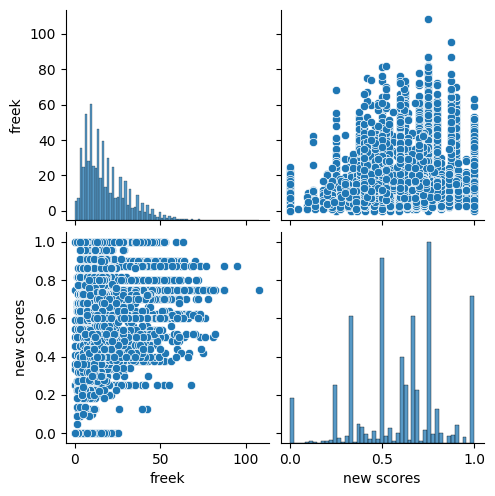

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(data, vars=["freek", "new scores"])
plt.show()

Generates a **Heatmap** using seaborn and matplotlib libraries to visualize the correlation matrix of the columns in the DataFrame 'data'. The 'annot=True' parameter adds the correlation values to the heatmap. Finally, it displays the heatmap using plt.show().







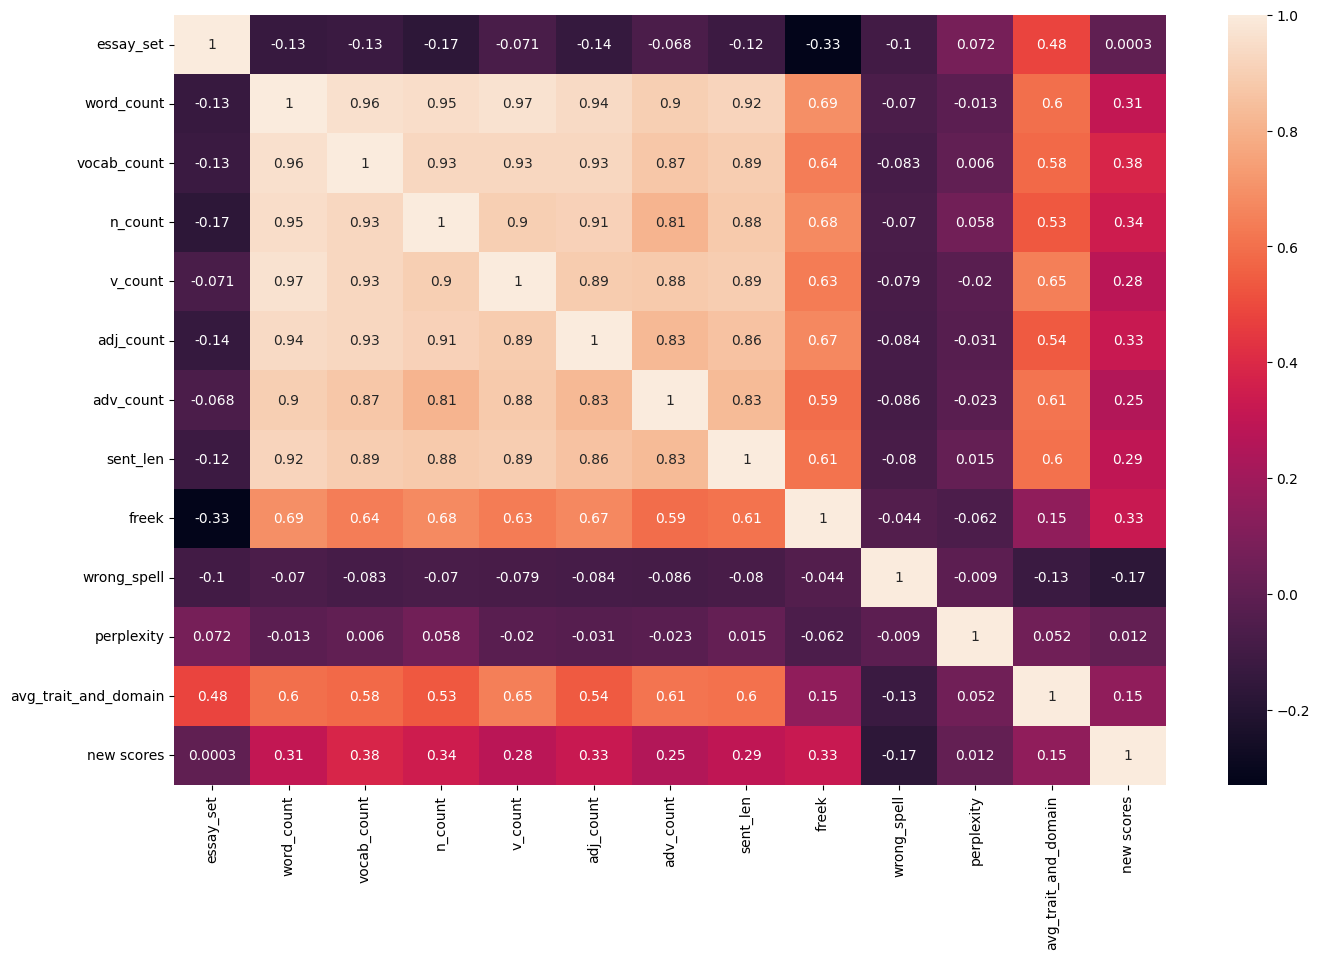

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**FINAL MODEL**

In [152]:
X = pd.read_csv(os.path.join( 'training_set_rel3.tsv'), sep='\t', encoding='ISO-8859-1')

# Extract the target variable
y = X['domain1_score']

# Drop NaN values
X = X.dropna(axis=1)

# Drop specified columns
columns_to_drop = ['rater1_domain1', 'rater2_domain1']
X = X.drop(columns=columns_to_drop)

# Display the first few rows of X and y
print("X:")
print(X.head())
print("\ny:")
print(y.head())

X:
   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   domain1_score  
0              8  
1              9  
2              7  
3             10  
4              8  

y:
0     8
1     9
2     7
3    10
4     8
Name: domain1_score, dtype: int64


In [153]:
X.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [154]:
minimum_scores = np.array([-1, 2, 1, 0, 0, 0, 0, 0, 0])
maximum_scores = np.array([-1, 12, 6, 3, 3, 4, 4, 30, 60])

Calculates a new scaled score ('score') from the existing 'domain1_score' column in DataFrame 'X' based on the essay set. It rescales the scores from their original range to a new range of 0 to 100. Then, it rounds the scores to the nearest integer for further calculation, and assigns them to variable 'y'. Finally, it displays the first few rows of DataFrame 'X' with the updated 'score' column.







In [155]:
old_min = minimum_scores[X['essay_set']]
old_max = maximum_scores[X['essay_set']]
old_range = old_max - old_min
new_min = 0
new_max = 100
new_range = (new_max - new_min)
X['score'] = (((X['domain1_score'] - old_min) * new_range) / old_range) + new_min

# round score to nearest integer for cohen kappa calculation
y = np.round(X['score'])

X.head()

,essay_id,essay_set,essay,domain1_score,score
0,1,1,"Dear local newspaper, I think effects computer...",8,60.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,70.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,50.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,80.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,60.0


In [156]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Defines several functions for processing essays:

1. **essay_to_wordlist:** Takes an essay as input, removes non-alphabetic characters, converts it to lowercase, splits it into words, and optionally removes stopwords.
2. **essay_to_sentences:** Tokenizes the essay into sentences using NLTK's punkt tokenizer and calls essay_to_wordlist for word tokenization.
3. **makeFeatureVec:** Generates a feature vector for an essay by averaging the word vectors obtained from a Word2Vec model.
4. **getAvgFeatureVecs:** Generates the word vectors for a list of essays using a Word2Vec model and returns them as a numpy array.

In [157]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec

def essay_to_wordlist(essay_v, remove_stopwords):
    """Remove the tagged labels and word tokenize the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    for word in words:
        if word in model:
            num_words += 1
            featureVec = np.add(featureVec, model[word])
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

**MODEL**

*   This model consists of two LSTM layers followed by a dropout layer and a dense output layer. Here's a summary of the model architecture:

* The first LSTM layer has 200 units, with a dropout rate of 0.4 to prevent overfitting. It takes input sequences of length 200.
* The second LSTM layer has 64 units, with a recurrent dropout rate of 0.4.
* A dropout layer with a rate of 0.5 is added to further prevent overfitting.
* Finally, a dense output layer with one unit and ReLU activation function is added.
The model is compiled using mean squared error as the loss function and RMSprop optimizer. Mean absolute error is used as a metric for evaluation.





In [158]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Sequential, load_model, model_from_config
import tensorflow.keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(200, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 200], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

Reads a pre-trained GloVe word embedding file ('glove.6B.200d.txt'), parses each line, extracts the word and its corresponding vector representation, and stores them in a dictionary named 'embedding_dict'. Each word is used as a key, and its vector representation is stored as a numpy array.

In [159]:
embedding_dict={}
with open(os.path.join( 'glove.6B.200d.txt'),'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        embedding_dict[word] = vectors


Implements a cross-validation loop using KFold with 5 splits. During each iteration of the loop, it trains a LSTM model on the training data, then evaluates it on the testing data using Cohen's kappa score. The process is repeated for each fold, and the average kappa score across all folds is computed. The trained LSTM model is saved as 'final_lstm.h5' after the final fold.

In [160]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score

cv = KFold(n_splits=5, shuffle=True)
results = []
y_pred_list = []

count = 1
for traincv, testcv in cv.split(X):

    print("\n--------Fold {}--------\n".format(count))
    X_test, X_train, y_test, y_train = X.iloc[testcv], X.iloc[traincv], y.iloc[testcv], y.iloc[traincv]

    train_essays = X_train['essay']
    test_essays = X_test['essay']

    sentences = []

    for essay in train_essays:
        # Obtaining all sentences from the training essays.
        sentences += essay_to_sentences(essay, remove_stopwords = True)

#     # Initializing variables for word2vec model.
    num_features = 200
#     min_word_count = 40
#     num_workers = 4
#     context = 10
#     downsampling = 1e-3

#     print("Training Word2Vec Model...")
#     model = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

#     model.init_sims(replace=True)
#     model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    model = embedding_dict

    # Generate training and testing data word vectors.
    clean_train_essays = []
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)

    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )

    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)

    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))

    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=80)
    y_pred = lstm_model.predict(testDataVecs)

    # Save any one of the 8 models.
    if count == 5:
         lstm_model.save('./final_lstm.h5')

    # Round y_pred to the nearest integer.
    y_pred = np.round(y_pred)

    # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
    result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
    print("Kappa Score: {}".format(result))
    results.append(result)

    count += 1


--------Fold 1--------

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_3 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 388705 (1.48 MB)
Trainable params: 388705 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
163/163 [==============================] - 11s 30ms/step - loss: 2687.4475 - mae: 46.8250
Epoch 2/80
163/163 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [161]:
print("Average Kappa score after a 5-fold cross validation: ", np.round(np.array(results).mean(),decimals=4))

Average Kappa score after a 5-fold cross validation:  0.6661


This function, test, takes an essay content as input. If the length of the content is greater than 20 characters, it tokenizes the content into words, generates the average feature vectors for the content using a pre-trained model, reshapes the vectors, predicts the score using a pre-trained LSTM model, and finally returns the predicted score rounded to the nearest integer. If the prediction is NaN, it returns 0. If the prediction is negative, it returns 0 as well.







In [193]:
import math
from gensim.test.utils import datapath
import gensim

def test(content):
  if len(content)>20:
    num_features = 200
    cte=[]
    cte.append(essay_to_wordlist(content,remove_stopwords= True))
    testDatavecs=getAvgFeatureVecs(cte,gensim.models.Word2Vec,num_features)
    testdatavecs= np.array(testdatavecs)
    testDataVecs = np.reshape(testDataVecs,(testDataVecs.shape[0],1,testDataVecs.shape[1]))
    preds=lstm.model.predict(testDataVecs)
    if math.isnan(preds):
      preds=0
    else:
      preds=np.round(preds)
    if preds<0:
      preds=0
    else:
      preds=0
    return preds


Multilayer Perception

In [163]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchtext.data import get_tokenizer
from torchtext.vocab import vocab
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from collections import Counter, OrderedDict

tokenizer = get_tokenizer('basic_english')

**This is a PyTorch implementation of a Multilayer Perceptron (MLP) model for classification tasks. Here's a breakdown of the components:**

1. **__init__ method:** Initializes the layers of the MLP. It takes parameters such as vocab_size (size of the vocabulary), embedding_dim (dimensionality of word embeddings), hidden_dim (dimensionality of the hidden layer), and num_classes (number of output classes).

2. **forward method:** Defines the forward pass of the model. It takes an input essay (which is expected to be a tensor of token indices representing words in the essay). It performs embedding lookup to convert token indices into dense word embeddings. Then, it calculates the mean of these embeddings along the sequence dimension (assuming the input is a sequence of word embeddings). This mean-pooling operation is used to aggregate information from all words into a fixed-length vector. The resulting vector is passed through a linear layer (linear1) followed by a ReLU activation function. Then, it is passed through another linear layer (linear2) followed by a sigmoid activation function to obtain the output probabilities for each class.

In [164]:
class MLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, essay):
        embedded = self.embedding(essay)
        hidden = torch.mean(embedded, dim=1)
        layer1 = self.linear1(hidden)
        layer1_relu = self.relu(layer1)
        layer2 = self.linear2(layer1_relu)
        output = self.sigmoid(layer2)
        return output

This is a PyTorch Dataset class (ASAPDataset) for handling essays and their corresponding scores in the ASAP dataset. Here's a breakdown of the components:

1. **__init__ method:** Initializes the dataset with essay data and a vocabulary object.
2. **__len__ method:** Returns the total number of samples in the dataset.
3. **__getitem__ method**: Retrieves a sample from the dataset at the given index. It fetches the essay text and its score, tokenizes the essay using the provided tokenizer, and converts the tokens into token indices using the vocabulary.
4. **collate_fn function:** This function is used as a parameter for DataLoader to collate a list of samples into a batch. It pads the essays to the maximum length within the batch with zeros to ensure uniformity in the input size. It returns a tuple of padded essays and their corresponding scores as tensors.







In [165]:
class ASAPDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        essay = sample[2]
        essay = self.vocab(tokenizer(essay))
        score = sample[3]
        return essay, score

def collate_fn(batch):
    essays, scores = zip(*batch)
    max_length = max([len(entry) for entry in essays])
    padded_essays = []
    for tokens in essays:
        padded_essay = tokens + [0] * (max_length - len(tokens))
        padded_essays.append(padded_essay)
    return torch.tensor(padded_essays, dtype=torch.int64), torch.tensor(scores, dtype=torch.int64)

These are utility functions for training and testing a PyTorch model on the essay dataset. Here's a breakdown of each function:

**training:** This function is used to train the model. It sets the model to training mode, iterates over the data batches, performs forward pass to get model predictions, normalizes the scores using min_max_normalization, calculates the loss using the specified criterion (e.g., Mean Squared Error), performs backpropagation to compute gradients, and updates the model parameters using the optimizer.

**testing:** This function is used to evaluate the model on the test data. It sets the model to evaluation mode, iterates over the test data batches, performs forward pass to get model predictions, normalizes the predictions using scaler, calculates the loss using the specified criterion, and computes the quadratic weighted kappa (QWK) score using the predicted scores and the ground truth scores. Finally, it returns the QWK score and the average loss over the test data.






In [166]:
def training(model, optimizer, data, criterion, prompt):
    model.train()
    loss = 0.0
    for (essay, scores) in data:
        optimizer.zero_grad()

        output = model(essay)
        scores = torch.tensor([min_max_normalization(score.item(), prompt) for score in scores], dtype=torch.float32)
        scores = scores.reshape(-1, 1)
        loss = criterion(output, scores)
        loss.backward()
        optimizer.step()

def testing(model, data, criterion, prompt):
    model.eval()
    total_loss = 0.0
    scores_4_qwk, output_4_qwk = [], []
    with torch.no_grad():
        for (essay, scores) in data:
            scores = scores.reshape(-1, 1)
            output = model(essay)
            output = torch.tensor([scaler(out.item(), prompt) for out in output ], dtype=torch.float32)
            output = output.reshape(-1, 1)
            loss = criterion(output, scores)
            total_loss += loss

            scores_4_qwk.append(scores)
            output_4_qwk.append(output)

    score_list = [score.item() for tensor_score in scores_4_qwk for score in tensor_score]
    output_list = [int(output.item()) for tensor_output in output_4_qwk for output in tensor_output]

    qwk = cohen_kappa_score(score_list, output_list, weights='quadratic')
    return qwk, total_loss / len(data)

In [167]:
file_path = 'training_set_rel3.tsv'
columns = ['essay_id', 'essay_set', 'essay', 'domain1_score']
asap = pd.read_csv(file_path, sep='\t')
asap.head()
asap.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plots a histogram of the 'essay_id' column from the DataFrame 'asap'. It uses Matplotlib to create the plot and sets the number of bins to 20. Additionally, it sets the title of the plot to 'essay_id'. Lastly, it removes the top and right spines of the plot using plt.gca().spines[['top', 'right']].set_visible(False).

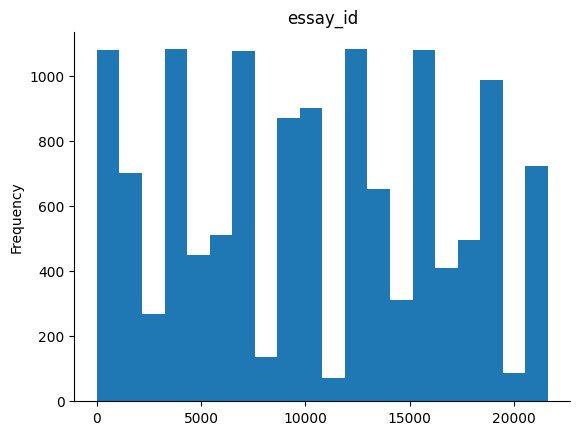

In [168]:
from matplotlib import pyplot as plt
asap['essay_id'].plot(kind='hist', bins=20, title='essay_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

Plots a histogram of the 'essay_set' column from the DataFrame 'asap'. It uses Matplotlib to create the plot and sets the number of bins to 20. Additionally, it sets the title of the plot to 'essay_set'. Lastly, it removes the top and right spines of the plot using plt.gca().spines[['top', 'right']].set_visible(False).







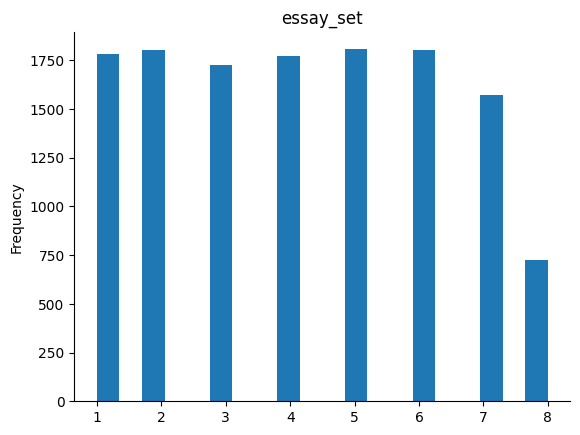

In [169]:
from matplotlib import pyplot as plt
asap['essay_set'].plot(kind='hist', bins=20, title='essay_set')
plt.gca().spines[['top', 'right',]].set_visible(False)

Plots a histogram of the 'domain1_score' column from the DataFrame 'asap'. It uses Matplotlib to create the plot and sets the number of bins to 20. Additionally, it sets the title of the plot to 'domain1_score'. Lastly, it removes the top and right spines of the plot using plt.gca().spines[['top', 'right']].set_visible(False).

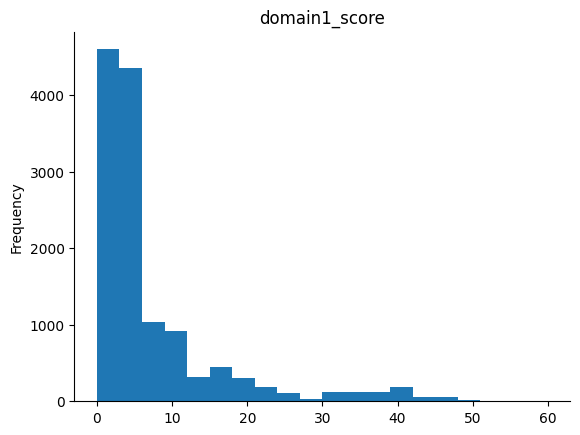

In [170]:
from matplotlib import pyplot as plt
asap['domain1_score'].plot(kind='hist', bins=20, title='domain1_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Creates a scatter plot using Matplotlib, where the x-axis represents the 'essay_set' column and the y-axis represents the 'domain1_score' column from the DataFrame 'asap'. Each point in the scatter plot represents an essay set and its corresponding domain 1 score. It sets the size of the markers to 32 and the transparency level to 0.8 (alpha=0.8). Additionally, it removes the top and right spines of the plot using plt.gca().spines[['top', 'right']].set_visible(False).







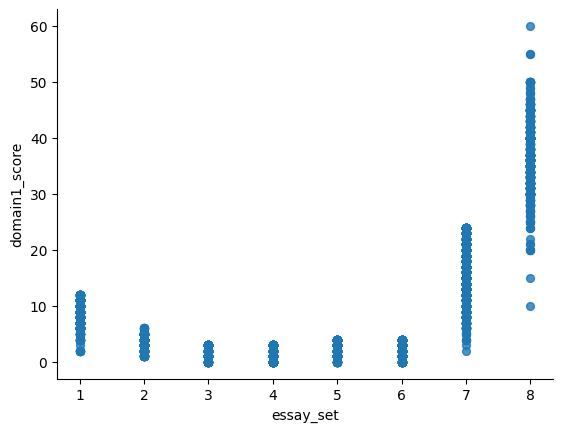

In [171]:
from matplotlib import pyplot as plt
asap.plot(kind='scatter', x='essay_set', y='domain1_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Creates a line plot using Matplotlib and Seaborn to visualize the relationship between 'essay_set' and 'domain1_score' from the DataFrame 'asap'. It sorts the DataFrame by 'essay_set' in ascending order and then plots the 'domain1_score' against 'essay_set'. It uses a Dark2 color palette from Seaborn for plotting. Additionally, it removes the spines from the plot using sns.despine(). The x-axis label is set to 'essay_set' and the y-axis label to 'domain1_score'.







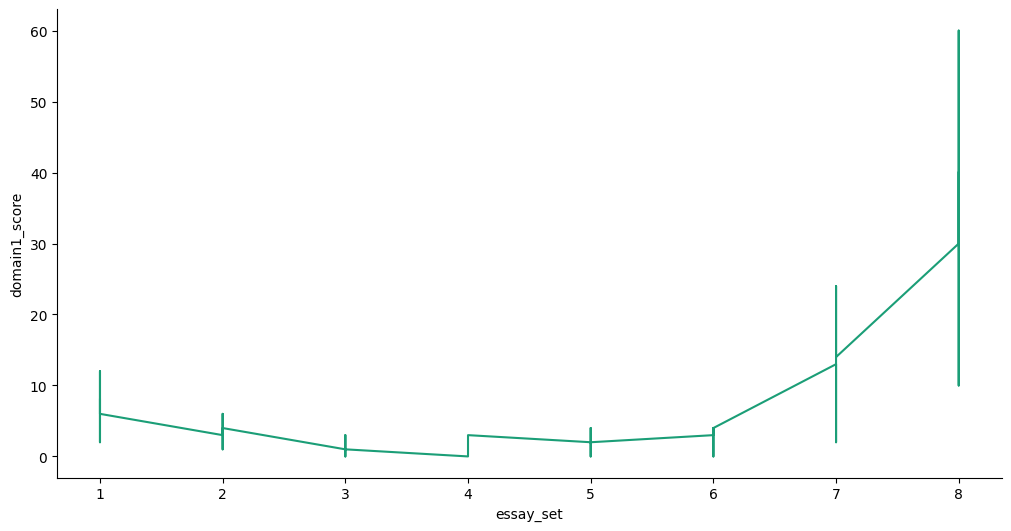

In [172]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['essay_set']
  ys = series['domain1_score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = asap.sort_values('essay_set', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('essay_set')
_ = plt.ylabel('domain1_score')

These functions are for min-max normalization (min_max_normalization) and scaling (scaler) based on the provided essay_set dictionary.

1. **min_max_normalization:**It takes a score and a prompt number as input and normalizes the score using min-max normalization based on the range defined in the essay_set dictionary for that prompt. It subtracts the minimum value from the score and divides it by the range.
2. **scaler:** It takes a normalized score and a prompt number as input and scales the score back to the original range using the range defined in the essay_set dictionary for that prompt. It multiplies the normalized score by the range and adds the minimum value.






In [173]:
essay_set = {
    1: (2, 12),
    2: (1, 6),
    3: (0, 3),
    4: (0, 3),
    5: (0, 4),
    6: (0, 4),
    7: (0, 30),
    8: (0, 60)
}
def min_max_normalization(score, prompt):
    return (score - essay_set[prompt][0]) / (essay_set[prompt][1] - essay_set[prompt][0])
def scaler(score, prompt):
    return round(score * (essay_set[prompt][1] - essay_set[prompt][0]) + essay_set[prompt][0])

This function, split_dataset, takes a prompt number as input and splits the dataset into training, validation, and test sets based on that prompt. It selects rows from the DataFrame 'asap' where the 'essay_set' column matches the provided prompt. Then, it uses torch.utils.data.random_split to randomly split the selected rows into three subsets with proportions of 60% for training, 20% for validation, and 20% for testing. It sets the random seed to ensure reproducibility. Finally, it returns the training, validation, and test sets.







In [174]:
def split_dataset(prompt):
    train, val, test = torch.utils.data.random_split(asap[asap['essay_set']==prompt].values, [0.6, 0.2, 0.2], generator=torch.Generator().manual_seed(42))
    return train, val, test

This function, essay_vectorizer, takes a list of essays as input and performs the following steps to vectorize the essays:

1. **Tokenization: It** tokenizes each essay by converting it to lowercase and splitting it into words using a tokenizer function (tokenizer).
2. **Vocabulary Creation:** It creates a vocabulary of unique tokens from all the essays.
3. **Special Tokens Handling:** It includes a special token "<unk>" for tokens that are out of vocabulary.
4. **Returns:** It returns the vocabulary object (vocab_essay) containing the token indices.

In [175]:
def essay_vectorizer(text):
    tokenized_essay = [tokenizer(field[2].lower()) for field in text]

    tokens = set()
    for essay in tokenized_essay:
        tokens.update(essay)

    tokens = list(tokens)

    vocab_essay = vocab(OrderedDict([(token, 1) for token in tokens]), specials=['<unk>'])
    vocab_essay.set_default_index(vocab_essay['<unk>'])

    return vocab_essay


This function, essay_dataloader, takes a prompt number and a batch size as input and prepares the training, validation, and test data loaders along with the vocabulary for essays based on that prompt. Here's what it does:

1. It splits the dataset into training, validation, and test sets using the split_dataset function based on the provided prompt.
2. It creates a vocabulary for essays using the essay_vectorizer function with the training data.
3. It initializes ASAPDataset objects for training, validation, and test sets using the provided vocabulary.
4. It creates DataLoader objects for training, validation, and test sets with the specified batch size, shuffling the training data and not shuffling the validation and test data.
5. Finally, it returns the training, validation, and test data loaders along with the vocabulary for essays.

In [176]:
def essay_dataloader(prompt, batch_size):

    train, val, test = split_dataset(prompt)
    vocab_essay = essay_vectorizer(train)

    asap_train = ASAPDataset(train, vocab_essay)
    train_dl = DataLoader(asap_train, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    asap_val = ASAPDataset(val, vocab_essay)
    val_dl = DataLoader(asap_val, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    asap_test = ASAPDataset(test, vocab_essay)
    test_dl = DataLoader(asap_test, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    return train_dl, val_dl, test_dl, vocab_essay

This function, graphs, is designed to plot graphs based on the provided results. Here's what it does:

1. It creates an array of epochs from 1 to the specified number of epochs.
2. It sets the title, xlabel, and ylabel of the plot based on the provided parameters.
3. If the result is a list of lists (indicating results for multiple prompts), it plots each list of results separately, labeling each line with the corresponding prompt number.
4. If the result is a single list (indicating results for a single prompt), it plots the result as a single line.
5. It displays the legend and shows the plot.

This function allows for easy visualization of training/validation/test metrics over epochs for one or multiple prompts.

In [177]:
def graphs(result, title, xlabel, ylabel, num_epochs, prompt):
    epochs = np.arange(1, num_epochs + 1, 1)
    #result = np.array(result)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if type(result[0]) == list:
        for idx, prompt_result in enumerate(result):
            plt.plot(epochs, np.array(prompt_result), label=f'Prompt {idx + 1}')
    else:
        plt.plot(epochs, np.array(result), label=f'Prompt {prompt}')
    plt.legend()
    plt.show()

Trains and evaluates the MLP model for each essay prompt using the provided parameters. Here's what it does:

1. It iterates over each prompt from 1 to 8.
2. For each prompt, it prepares the data loaders for training, validation, and testing using the essay_dataloader function.
3. It initializes the MLP model with the specified parameters: vocab_size, embedding_dim, hidden_dim, and num_classes.
4. It defines the optimizer (RMSprop) with a learning rate of 0.001 and alpha of 0.9.
5. It trains the model for the specified number of epochs (EPOCHS) using the training data loader, and evaluates it on the validation data loader after each epoch.
6. It records the quadratic weighted kappa (QWK) and mean squared error (MSE) scores for each epoch on the validation set.
7. After training, it evaluates the model on the test data loader and records the QWK and MSE scores for the test set.
8. Finally, it stores the QWK and MSE scores for validation and test sets for each prompt.

In [178]:
prompt = 1
embedding_dim = 50
criterion = nn.MSELoss()
hidden_dim = 100
EPOCHS = 50
batch_size = 32
num_classes = 1

qwk_prompts_val, mse_prompts_val, qwk_prompts_test, mse_prompts_test  = [], [], [], []

for prompt in range(1, 9):
    train_dl, val_dl, test_dl, vocab_essay = essay_dataloader(prompt, batch_size)
    vocab_size = len(vocab_essay)

    model = MLP(vocab_size, embedding_dim, hidden_dim, num_classes)
    optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)

    qwk_epoch, mse_epoch = [], []
    for epoch in range(0, EPOCHS):
        training(model, optimizer, train_dl, criterion, prompt) # Training
        qwk, mse = testing(model, val_dl, criterion, prompt) # Validation

        qwk_epoch.append(qwk)
        mse_epoch.append(mse.item())

    qwk_prompts_val.append(qwk_epoch)
    mse_prompts_val.append(mse_epoch)

    #Testing
    qwk_test, mse_test = testing(model, test_dl, criterion, prompt)
    qwk_prompts_test.append(qwk_test)
    mse_prompts_test.append(mse_test)

In [179]:
graph_settings = {
    'title': ('Model performance(QWK)', 'Model Error(MSE)'),
    'xlabel': '# Epochs',
    'ylabel': ('Agreement (QWK)', 'Error (MSE)')
}

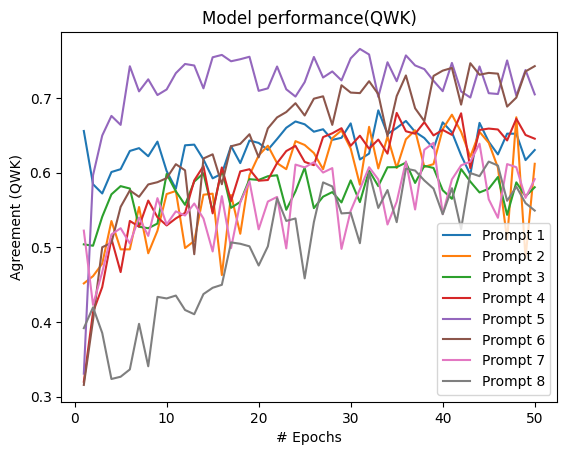

In [180]:
graphs(qwk_prompts_val, graph_settings['title'][0], graph_settings['xlabel'], graph_settings['ylabel'][0], EPOCHS, prompt)

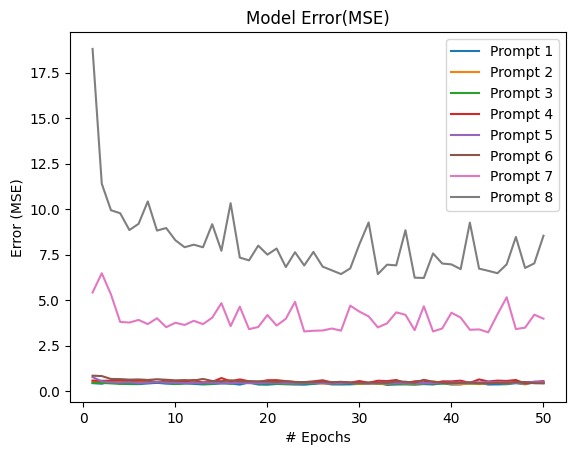

In [181]:
graphs(mse_prompts_val, graph_settings['title'][1], graph_settings['xlabel'], graph_settings['ylabel'][1], EPOCHS, prompt)

Creates a bar plot using Matplotlib to visualize the model performance in terms of Quadratic Weighted Kappa (QWK) scores for each prompt on the test set. It plots the QWK scores on the y-axis and the essay prompts on the x-axis. Additionally, it sets the x-axis label to 'Prompts', the y-axis label to 'Agreement (QWK)', and the title of the plot to 'Model performance (QWK)'. Finally, it displays the plot using plt.show().







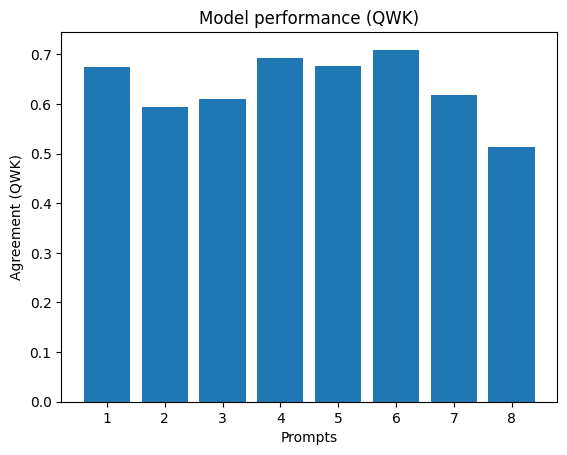

In [182]:
prompts = range(1, 9)
plt.bar(prompts, qwk_prompts_test)
plt.xlabel('Prompts')
plt.ylabel('Agreement (QWK)')
plt.title('Model performance (QWK)')
plt.show()